In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
#!pip install pyramid.arima

In [3]:
train=pd.read_csv('DailyDelhiClimateTrain.csv')
train.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [4]:
test=pd.read_csv('DailyDelhiClimateTest.csv')
test.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333


In [5]:
train=train[['date', 'meantemp']].copy()
test=test[['date', 'meantemp']].copy()

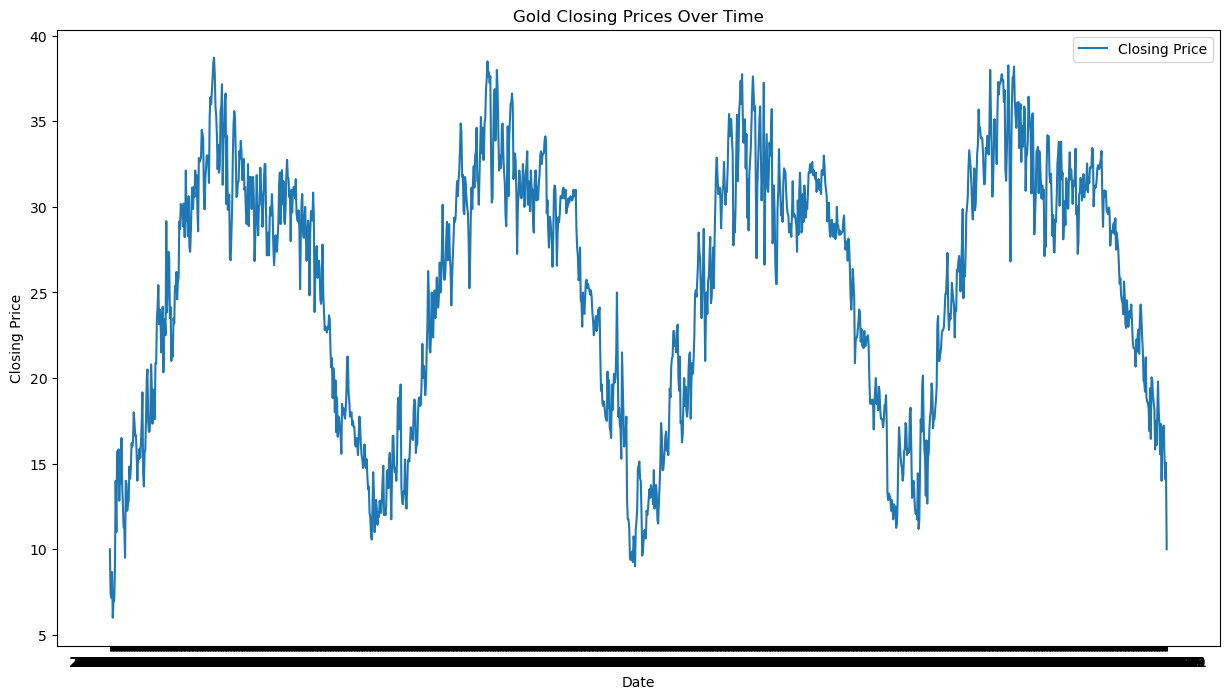

In [6]:
# Visualize the data
plt.figure(figsize=(15, 8))
plt.plot(train['date'], train['meantemp'], label='Closing Price')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Gold Closing Prices Over Time')
plt.legend()
plt.show()

In [7]:
import numpy as np
# Tính chuỗi return
r_t = np.log(train['meantemp']/train['meantemp'].shift(1)).values


In [8]:
mean = np.nanmean(r_t)
r_t[0]=mean
r_t[:5]

array([-9.11887495e-19, -3.01105093e-01, -3.20393537e-02,  1.90043603e-01,
       -3.67724780e-01])

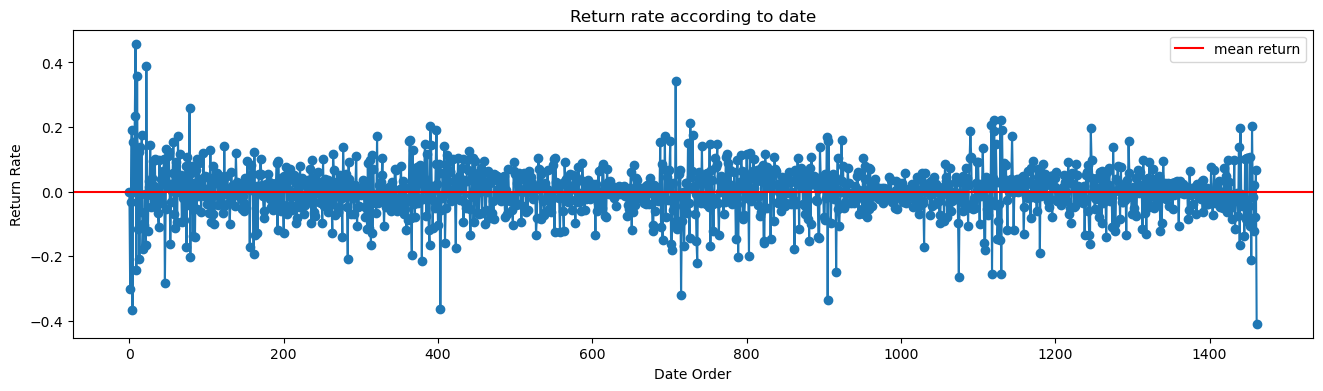

In [9]:
plt.figure(figsize=(16, 4))
plt.plot(np.arange(r_t.shape[0]), r_t, '-o')
plt.axhline(y=mean, label='mean return', c='red')
plt.title('Return rate according to date')
plt.xlabel('Date Order')
plt.ylabel('Return Rate')
plt.legend()
plt.show()

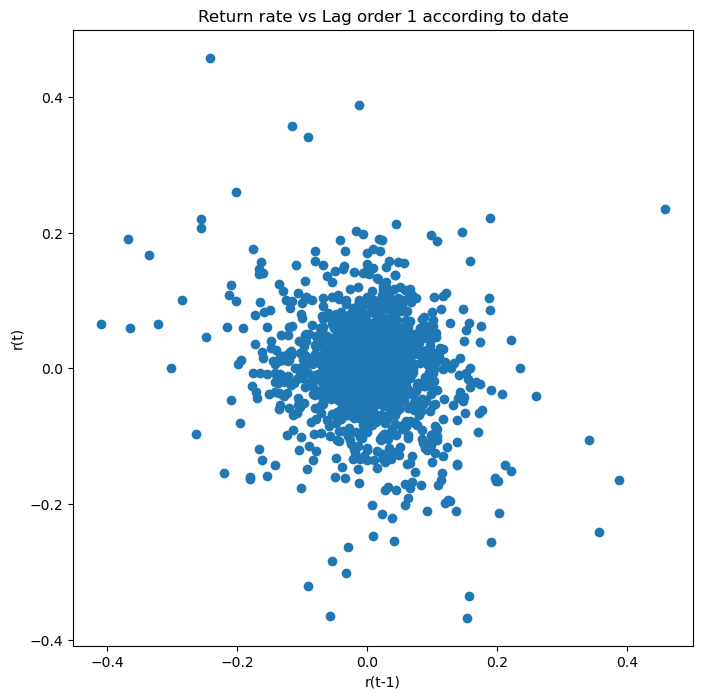

In [10]:
plt.figure(figsize=(8, 8))
plt.scatter(x=r_t[1:], y=r_t[:-1])
plt.title('Return rate vs Lag order 1 according to date')
plt.xlabel('r(t-1)')
plt.ylabel('r(t)')
plt.show()

In [11]:
#!pip install --upgrade scipy statsmodels

In [12]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(r_t)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -21.106675
p-value: 0.000000
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568


In [13]:
import pmdarima as pm
auto_arima_model = pm.auto_arima(r_t, 
                                 start_p=1, start_q=1, 
                                 max_p=5, max_q=5, 
                                 seasonal=True,  # Không có mùa vụ
                                 trace=True,  
                                 stepwise=True)
print(auto_arima_model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-3482.409, Time=0.23 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-3403.790, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-3446.005, Time=0.30 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-3454.259, Time=4.35 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-3405.790, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-3481.767, Time=9.90 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-3481.580, Time=7.37 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-3463.273, Time=8.95 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-3451.621, Time=1.65 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-3483.954, Time=8.91 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-3482.185, Time=5.96 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-3482.152, Time=11.13 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-3481.887, Time=11.20 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-3482.129, Time=9.68 sec
 ARIMA(3,0,3)(0,0

In [14]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMA model (replace order with the desired (p, d, q))
model_arima = ARIMA(r_t, order=(2, 0, 2))
model_fit = model_arima.fit()

# Print the summary of the model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1462
Model:                 ARIMA(2, 0, 2)   Log Likelihood                1747.977
Date:                Sat, 05 Oct 2024   AIC                          -3483.953
Time:                        20:15:53   BIC                          -3452.228
Sample:                             0   HQIC                         -3472.119
                               - 1462                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002      0.001      0.185      0.853      -0.002       0.002
ar.L1         -0.2737      0.103     -2.645      0.008      -0.476      -0.071
ar.L2          0.5430      0.056      9.719      0.0


Predicted future values:
 [ 0.04196536  0.03849807  0.01238865  0.01765127  0.00203478  0.00916584
 -0.00126476  0.00546157 -0.00204255  0.00366317]


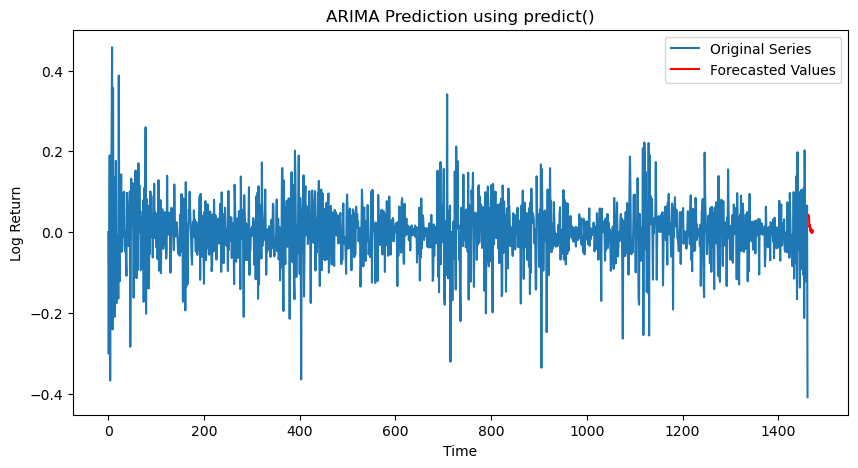

In [15]:
n_pred_perious = 10
# Define the range for prediction: from start to future steps
start = len(r_t)+1  # start from the last data point
end = start + n_pred_perious-1  # predict 10 future steps

predicted_values = model_fit.predict(start=start, end=end)

# Display predicted values
print("\nPredicted future values:\n", predicted_values)

# Plot the original data and the forecast
plt.figure(figsize=(10, 5))
plt.plot(np.arange(len(r_t)), r_t, label="Original Series")
plt.plot(np.arange(len(r_t)+1, len(r_t) + n_pred_perious+1), predicted_values, label="Forecasted Values", color='red')
plt.title('ARIMA Prediction using predict()')
plt.xlabel('Time')
plt.ylabel('Log Return')
plt.legend()
plt.show()

In [17]:
# Assuming the first known value in meantemp is the first element
original_meantemp = np.zeros(len(predicted_values) + 1)

# The first value of the original series is known
original_meantemp[0] = train['meantemp'].iloc[0]

# Reverse the log returns to reconstruct the original series
for t in range(1, len(original_meantemp)):
    original_meantemp[t] = original_meantemp[t-1] * np.exp(predicted_values[t-1])

# Convert back to a pandas Series for easier handling
original_meantemp_series = pd.Series(original_meantemp[1:], name='Reconstructed Meantemp')

# Display the first few reconstructed values
print(original_meantemp_series.head())

0    10.428584
1    10.837892
2    10.972994
3    11.168401
4    11.191149
Name: Reconstructed Meantemp, dtype: float64


In [18]:
test_ors = test.head(n_pred_perious).copy()

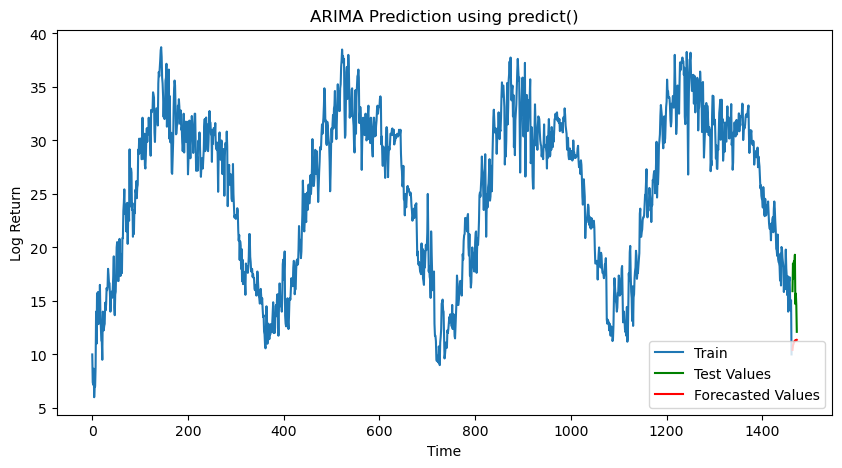

In [19]:
# Plot the original data and the forecast
plt.figure(figsize=(10, 5))
plt.plot(np.arange(len(train)), train['meantemp'], label="Train")
plt.plot(np.arange(len(train)+1, len(train) + 1 + n_pred_perious), test_ors['meantemp'], label="Test Values", color='green')
plt.plot(np.arange(len(train)+1, len(train) + 1 + len(original_meantemp_series)), original_meantemp_series, label="Forecasted Values", color='red')
plt.title('ARIMA Prediction using predict()')
plt.xlabel('Time')
plt.ylabel('Log Return')
plt.legend()
plt.show()

In [20]:
# Evaluate the model with additional metrics
# MSE
mse = mean_squared_error(test_ors['meantemp'], original_meantemp_series)

# RMSE
rmse = mse ** 0.5

# MAE
mae = mean_absolute_error(test_ors['meantemp'], original_meantemp_series)

# MAPE
mape = np.mean(np.abs((test_ors['meantemp'] - original_meantemp_series) / test_ors['meantemp'])) * 100

# R-squared
r2 = r2_score(test_ors['meantemp'], original_meantemp_series)

# Print the evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"R-squared (R²): {r2}")


Mean Squared Error (MSE): 34.11371069050267
Root Mean Squared Error (RMSE): 5.840694367153846
Mean Absolute Error (MAE): 5.381282797300177
Mean Absolute Percentage Error (MAPE): 31.22%
R-squared (R²): -6.118095241769572
